***Introduction***
This is a simple analysis of the FM23 scout database for EFL Championship team Northhampton. 

P.S: This notebook is incomplete as I have plans to add a lot more to it in the future. 

***Problem Backgroud***
Our scouts have handed us the raw data for all the available players in our scouting range. 

This can be really overwhelming when finding the right player for recruitment as we have a ton of information on the players. 

So we'll try our best to organize and water down the data for our analysis.

***Objective of the Dataset***

- Finding Goalscorers: 
Due to our poor goalscoring form, we need to find attackers who can score goals and overperform his xG in the league. 

- Finding players who can compete in a higher division:
We need to make sure that the attackers are capable of playing in Sky Bet Championship. So we will seek players who play in a similar or closer level of the league. 

- Age analysis:
We'll find attackers who're young so that we can demand high transfer fees for them in the future.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv('D:\\Data Analytics\\Football Analytics\\FM23_scout_dataset.csv',encoding =('ISO-8859-1'),low_memory =False)
df.head()

,Name,Nat,Club,League,Position,Age,Preferred_foot,Height,Starts,Sub_Apps,...,Off,Gl_Mst,Sprints_90,Distance_km,Pens,Pens_Scored,Yel,Red,xG,xA
0,Conor Coventry,IRL,Cardiff,Sky Bet Championship,DM,32,Right,5.1,11,21,...,0,0,11.8,202.1,0,0,3,0,0.49,0.81
1,Darren Charles,TRI,Blackburn,Sky Bet Championship,DC,22,Left,5.5,0,1,...,0,0,0.0,3.0,0,0,0,0,0.00,0.00
2,Nathan Wood,ENG,Cardiff,Sky Bet Championship,DC,29,Right,6.2,8,19,...,2,1,6.8,142.1,0,0,6,0,0.39,0.48
3,Harry Clarke,ENG,Sunderland,Sky Bet Championship,DC,31,Right,6.2,1,8,...,0,0,11.0,33.0,0,0,0,1,0.09,0.00
4,Dujon Sterling,ENG,Birmingham,Sky Bet Championship,DC,32,Right,5.1,0,3,...,0,0,0.0,6.4,0,0,0,0,0.00,0.00


# Data Exploration

We'll apply try out different attribute commands to get a better hang of the dataframes. 

In [10]:
# Show number of rows and columns
df.shape

(422, 49)

In [11]:
# Show the name of all the columns
df.columns

Index(['Name', 'Nat', 'Club', 'League', 'Position', 'Age', 'Preferred_foot',
       'Height', 'Starts', 'Sub_Apps', 'Apps', 'Mins', 'Transfer_Value',
       'Wage_per_week', 'Asking_Price', 'Gls', 'Ast', 'Drb', 'Shots', 'ShT',
       'Hdrs_A', 'Hdrs', 'Pres_A', 'Pres_C', 'Tck_A', 'Tck_W', 'K_Tck', 'Blk',
       'Shts_Blckd', 'Itc', 'Clear', 'Clean_sheets', 'Pas_Completion_rate',
       'Pro_Passes', 'Pas_A', 'K_Pas', 'CCC', 'Cr_A', 'Cr_C', 'Off', 'Gl_Mst',
       'Sprints_90', 'Distance_km', 'Pens', 'Pens_Scored', 'Yel', 'Red', 'xG',
       'xA'],
      dtype='object')

In [12]:
# Show an overview of the dataframe to help in the analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 422 non-null    object 
 1   Nat                  422 non-null    object 
 2   Club                 422 non-null    object 
 3   League               422 non-null    object 
 4   Position             422 non-null    object 
 5   Age                  422 non-null    int64  
 6   Preferred_foot       422 non-null    object 
 7   Height               422 non-null    float64
 8   Starts               422 non-null    int64  
 9   Sub_Apps             422 non-null    int64  
 10  Apps                 422 non-null    int64  
 11  Mins                 422 non-null    int64  
 12  Transfer_Value       422 non-null    object 
 13  Wage_per_week        422 non-null    int64  
 14  Asking_Price         43 non-null     float64
 15  Gls                  422 non-null    int

In [13]:
# Gives a mathematical output of all the numerical columns in the dataframe
df.describe()

,Age,Height,Starts,Sub_Apps,Apps,Mins,Wage_per_week,Asking_Price,Gls,Ast,...,Off,Gl_Mst,Sprints_90,Distance_km,Pens,Pens_Scored,Yel,Red,xG,xA
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,43.000000,422.000000,422.000000,...,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,23.180095,5.799763,13.469194,4.635071,18.104265,1211.582938,3657.345972,0.625349,1.476303,0.988152,...,3.808057,0.154028,5.764929,148.041943,0.063981,0.056872,1.701422,0.116114,1.448649,1.017038
std,2.718072,0.454615,16.833056,6.694168,18.244279,1419.282013,3269.483342,1.178551,3.504752,1.792662,...,10.359047,0.637297,5.975616,185.084867,0.518706,0.484033,2.804975,0.411562,2.849812,1.527482
min,18.000000,5.100000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,5.150000,0.000000,0.000000,1.000000,10.000000,1500.000000,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,5.950000,3.000000,2.000000,11.000000,411.500000,2400.000000,0.220000,0.000000,0.000000,...,0.000000,0.000000,5.300000,41.450000,0.000000,0.000000,0.000000,0.000000,0.100000,0.210000
75%,24.000000,6.100000,30.000000,7.000000,36.000000,2615.250000,4675.000000,0.475000,1.000000,1.000000,...,2.000000,0.000000,9.800000,312.400000,0.000000,0.000000,2.000000,0.000000,1.575000,1.525000
max,33.000000,6.800000,52.000000,39.000000,53.000000,4590.000000,18000.000000,6.000000,24.000000,12.000000,...,97.000000,9.000000,34.400000,610.900000,7.000000,7.000000,15.000000,3.000000,19.480000,8.100000


---Creating new columns

In [14]:
# Minutes per match column
df['mins_per_match'] = df['Mins'] / df['Apps']

# Goals per 90 minutes column

df['goals_per_90'] = (df['Gls']/ df['Mins']) * 90 # Goals per 90 = (Goals scored / Minutes) * 90

df.head()

,Name,Nat,Club,League,Position,Age,Preferred_foot,Height,Starts,Sub_Apps,...,Sprints_90,Distance_km,Pens,Pens_Scored,Yel,Red,xG,xA,mins_per_match,goals_per_90
0,Conor Coventry,IRL,Cardiff,Sky Bet Championship,DM,32,Right,5.1,11,21,...,11.8,202.1,0,0,3,0,0.49,0.81,43.062500,0.065312
1,Darren Charles,TRI,Blackburn,Sky Bet Championship,DC,22,Left,5.5,0,1,...,0.0,3.0,0,0,0,0,0.00,0.00,19.000000,0.000000
2,Nathan Wood,ENG,Cardiff,Sky Bet Championship,DC,29,Right,6.2,8,19,...,6.8,142.1,0,0,6,0,0.39,0.48,37.851852,0.000000
3,Harry Clarke,ENG,Sunderland,Sky Bet Championship,DC,31,Right,6.2,1,8,...,11.0,33.0,0,0,0,1,0.09,0.00,24.555556,0.000000
4,Dujon Sterling,ENG,Birmingham,Sky Bet Championship,DC,32,Right,5.1,0,3,...,0.0,6.4,0,0,0,0,0.00,0.00,12.333333,0.000000


# Data Cleaning

---We'll clean up the data and drop some null values to make the dataset more usable.

In [15]:
# We'll find the values that are null in the dataframe. This will help us filter out some players to get a better observation.
df.isna().sum()

Name                     0
Nat                      0
Club                     0
League                   0
Position                 0
Age                      0
Preferred_foot           0
Height                   0
Starts                   0
Sub_Apps                 0
Apps                     0
Mins                     0
Transfer_Value           0
Wage_per_week            0
Asking_Price           379
Gls                      0
Ast                      0
Drb                      0
Shots                    0
ShT                      0
Hdrs_A                   0
Hdrs                     0
Pres_A                   0
Pres_C                   0
Tck_A                    0
Tck_W                    0
K_Tck                    0
Blk                      0
Shts_Blckd               0
Itc                      0
Clear                    0
Clean_sheets             0
Pas_Completion_rate      0
Pro_Passes               0
Pas_A                    0
K_Pas                    0
CCC                      0
C

--- Filtering out players who have made 0 appearance in the last season.

In [16]:
filtered_df = df.dropna(subset=['Apps']) # This drops the null values in the Apps column.
filtered_df.head()

,Name,Nat,Club,League,Position,Age,Preferred_foot,Height,Starts,Sub_Apps,...,Sprints_90,Distance_km,Pens,Pens_Scored,Yel,Red,xG,xA,mins_per_match,goals_per_90
0,Conor Coventry,IRL,Cardiff,Sky Bet Championship,DM,32,Right,5.1,11,21,...,11.8,202.1,0,0,3,0,0.49,0.81,43.062500,0.065312
1,Darren Charles,TRI,Blackburn,Sky Bet Championship,DC,22,Left,5.5,0,1,...,0.0,3.0,0,0,0,0,0.00,0.00,19.000000,0.000000
2,Nathan Wood,ENG,Cardiff,Sky Bet Championship,DC,29,Right,6.2,8,19,...,6.8,142.1,0,0,6,0,0.39,0.48,37.851852,0.000000
3,Harry Clarke,ENG,Sunderland,Sky Bet Championship,DC,31,Right,6.2,1,8,...,11.0,33.0,0,0,0,1,0.09,0.00,24.555556,0.000000
4,Dujon Sterling,ENG,Birmingham,Sky Bet Championship,DC,32,Right,5.1,0,3,...,0.0,6.4,0,0,0,0,0.00,0.00,12.333333,0.000000


--- Some players can play in multiple positions. But we're only going to consider their primary position for now.

In [17]:
df['Position'] = df['Position'].apply(lambda x: x.split(',')[0]) # This only picks the first position, ignoring any other position after ',' 
df[['Name', 'Position']].head()

,Name,Position
0,Conor Coventry,DM
1,Darren Charles,DC
2,Nathan Wood,DC
3,Harry Clarke,DC
4,Dujon Sterling,DC


In [18]:
df['Position'].unique() # An array of all the position in the dataset

array(['DM', 'DC', 'WBR', 'AML', 'AM', 'AMR', 'WBL', 'GK', 'CM', 'ST'],
      dtype=object)

Now that the dataset is cleaner and more presentable, we can proceed with our analysis

# Descriptive Analysis

---Finding number of players from different leagues in the scouting database.

In [28]:
players_by_league =df['League'].value_counts().head()
players_by_league

League
Sky Bet Championship        201
Sky Bet League One           96
Sky Bet League Two           56
English Premier Division     23
Vanarama National League      8
Name: count, dtype: int64

Text(0.5, 1.0, 'Players by league')

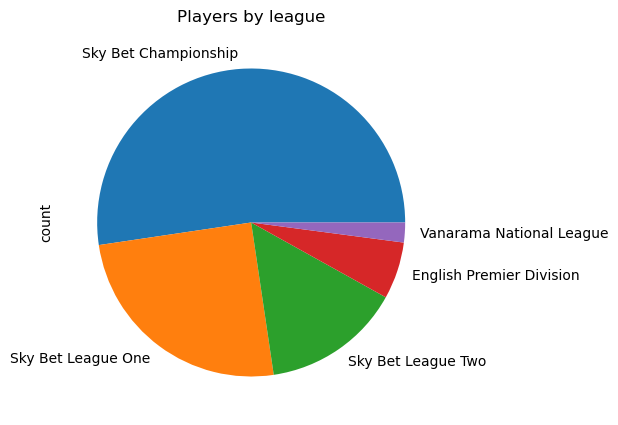

In [30]:
players_by_league.plot(kind='pie', figsize=(10,5))
plt.title('Players by league')

***Observation:
 
Looks like the scout database is heavily focused on England, with high emphasis on     second, third, and fourth tier of English football.

1. Goalscoring Analysis

--- Show the top goalscorers in Sky Bet Championship league


In [20]:
Championship_players = df['League'] == 'Sky Bet Championship'
Championship_top_scorer = df[Championship_players].nlargest(n=10, columns='Gls')
Championship_top_scorer[['Name', 'Gls', 'goals_per_90']].head(10)

,Name,Gls,goals_per_90
27,Stephen Gold,23,0.488553
36,Sonny Finch,9,0.264102
96,Martin Nikolic,8,0.594550
29,Harry Leonard,5,0.134933
6,Jeremy Tisserand,4,0.363636
71,Cian Ashford,4,0.565149
42,George Thomason,3,0.095238
54,Myles Cristofaro,3,0.415385
95,Curtis Snaith,3,0.452261
52,Femi Azeez,2,0.220049


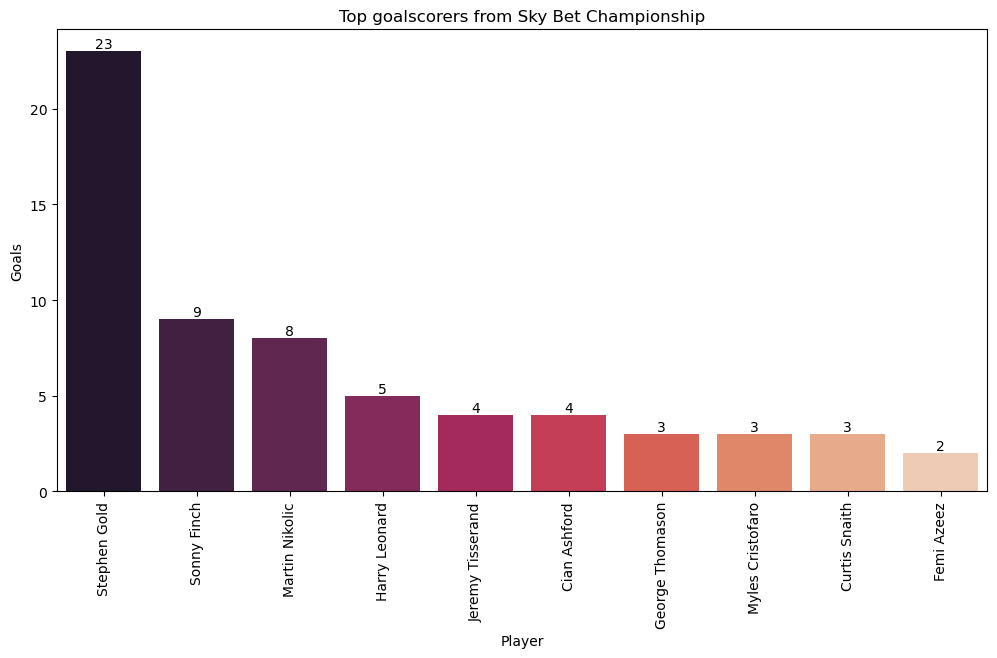

In [21]:
plt.figure(figsize=(12,6))
ax= sns.barplot(data=Championship_top_scorer, x= 'Name', y='Gls', palette='rocket')
plt.xlabel('Player')
plt.ylabel('Goals')
plt.xticks(rotation=90)
plt.title('Top goalscorers from Sky Bet Championship')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

---Finding players with over 10 Appearances who have better Goals_per_90 stats

In [50]:
min_apps = df[df['Apps'] > 10]
goalscorers = min_apps.nlargest(n=20, columns='goals_per_90')
top_goals_per_90 = goalscorers[['Name', 'Apps','goals_per_90']].head(10)
top_goals_per_90.sort_values(by='goals_per_90',ascending=False)

,Name,Apps,goals_per_90
120,George Hirst,48,0.732949
303,Iwan Morgan,35,0.691548
319,Collins Odita,19,0.657371
96,Martin Nikolic,31,0.594550
71,Cian Ashford,14,0.565149
294,Frank Tattum,48,0.515882
242,Alphonso Wood,43,0.504673
27,Stephen Gold,52,0.488553
8,Marley Erskine,46,0.471204
95,Curtis Snaith,22,0.452261


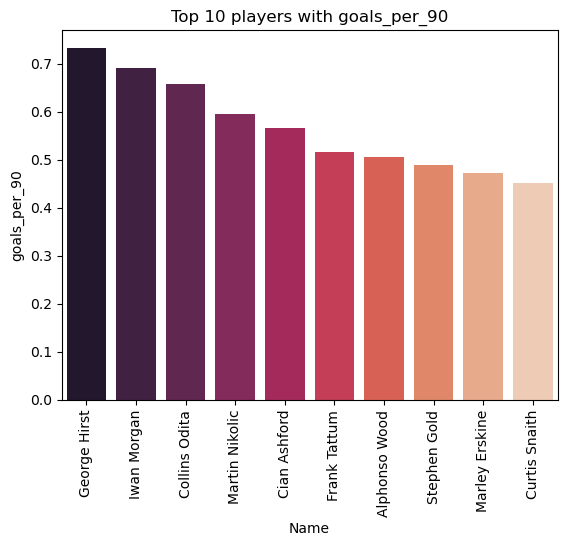

In [126]:
sns.barplot(data=top_goals_per_90, x = 'Name', y= 'goals_per_90', palette='rocket')
plt.xticks(rotation=90)
plt.title('Top 10 players with goals_per_90')
plt.show()

--- Find out clinical penalty takers

In [206]:
df['penalty_success'] = df['Pens_Scored'] / df['Pens']
clinical_pen_taker = df[df['Pens'] >= 2] # We're considering players who've taken atleast 2 penalties.

clinical_pen_taker[['Name', 'League','Age','Pens','penalty_success']].sort_values(by='penalty_success', ascending=False).head()



#penalty_takers = df[df['Pens'] >=2] 
#penalty_success = penalty_takers['Pens_Scored'] / penalty_takers['Pens']
#penalty_success[['Name', ]]

,Name,League,Age,Pens,penalty_success
71,Cian Ashford,Sky Bet Championship,27,2,1.000000
294,Frank Tattum,Sky Bet League Two,25,7,1.000000
395,Karl O'Connor,Sky Bet League Two,24,2,1.000000
120,George Hirst,Sky Bet League One,33,7,0.857143


+++ There are only 4 penalty takers in the scout database who attempted more than 2 penalty kicks in a single season. This is not enough data to measure a player's penalty taking ability.

Frank Tattum seems to be the best penalty taker of the bunch. 

Unfortunately, he plays two division below us and unlikely to ever become a Championship level player in future.

In comparison, George Hirst seems to be a better pick despite having a slightly lower penalty success_rate.

---Finding attackers who outperformed their XG

In [210]:
finishers = df[df['Apps'] >=10]

finishers['xG_diff'] = finishers['Gls'] - finishers['xG']

xG = finishers[(finishers['xG_diff'] >0) & (finishers['Position'].isin(['ST','AML', 'AMR', 'AM']) & finishers['League'].isin(['Sky Bet Championship','Sky Bet League One', 'Sky Bet League Two']))]
xG_outperformers = xG.sort_values(by= 'xG_diff', ascending=False).head(10)
xG_outperformers[['Name','League', 'Age', 'Position', 'Apps', 'Gls', 'xG_diff', 'goals_per_90','Wage_per_week']]

C:\Users\ahnaf\AppData\Local\Temp\ipykernel_11008\2990222001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finishers['xG_diff'] = finishers['Gls'] - finishers['xG']


,Name,League,Age,Position,Apps,Gls,xG_diff,goals_per_90,Wage_per_week
120,George Hirst,Sky Bet League One,33,AMR,48,24,10.32,0.732949,4100
8,Marley Erskine,Sky Bet League Two,23,AM,46,19,6.81,0.471204,14250
303,Iwan Morgan,Sky Bet League Two,26,ST,35,21,4.88,0.691548,1600
294,Frank Tattum,Sky Bet League Two,25,ST,48,24,4.52,0.515882,1600
27,Stephen Gold,Sky Bet Championship,24,AM,52,23,3.92,0.488553,10250
236,Greg Fitzpatrick,Sky Bet League Two,24,AM,53,13,3.37,0.311253,2200
189,Ryan Manley,Sky Bet League Two,21,AMR,45,11,2.76,0.344108,2800
217,Kodi McCoist,Sky Bet League One,23,ST,36,12,2.33,0.382301,2400
96,Martin Nikolic,Sky Bet Championship,20,ST,31,8,2.21,0.594550,5000
6,Jeremy Tisserand,Sky Bet Championship,23,AML,28,4,1.86,0.363636,14500


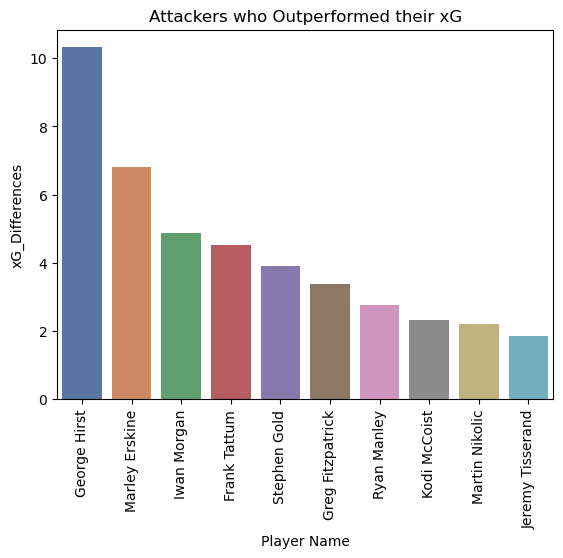

In [208]:
sns.barplot(data =xG_outperformers, x= 'Name', y ='xG_diff', palette='deep')
plt.xlabel('Player Name')
plt.ylabel('xG_Differences')
plt.title('Attackers who Outperformed their xG')
plt.xticks(rotation=90)
plt.show()

+++ Attacking Options +++

- George Hirst: 

The 33 y/o veteran George Hirst has massively outperformed his xG, proving that he still has what it takes to find the back of the net. With 24 goals in 48 appearances, the veteran has the ability to step up in the Championship. 

An estimated wage demand of 4,100 also seems to be a bargain for the proven forward. 

However, it'd be best to only offer him a one-year contract considering him age. 

- Stephen Gold:

The 22 year of Attacking Midfielder has a keen eye for goalscoring, averaging almost .5 goals per 90 in the Championship.

With age on his side, and enourmous potential for the future, we should try our best to sign him as our primary goalscorer.

However, his 10k per wage will make him one of the highest paid player of our club. It's also going to be difficult to get our hands on the player for cheap.

- Martin Nikolic:
Martin Nikolic is the youngest striker in our shortlist, scoring 8 goals in 31 appearances in the Championship. With age on his side, the young striker has tremendous potential to reach bigger heights in the future. 

His 5k/week wage demand also makes him a good signing option. 


--- Right Footed Finishers vs Left Footed Finishers

C:\Users\ahnaf\AppData\Local\Temp\ipykernel_11008\2241159623.py:36: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


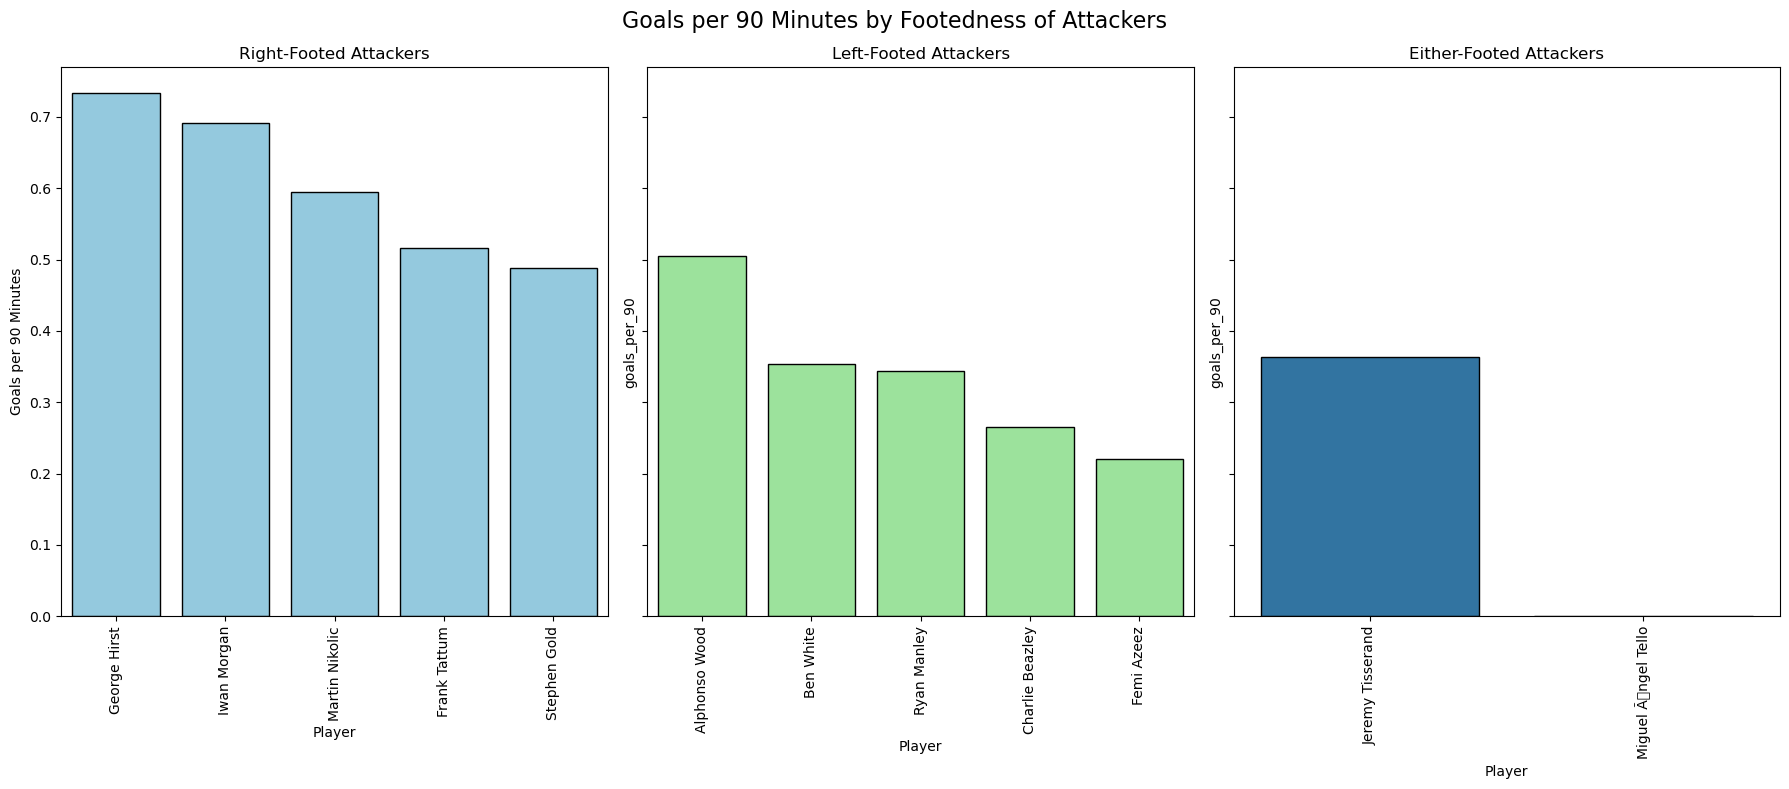

In [153]:
right_footed_att = df[(df['Preferred_foot']=='Right') & (df['Position'].isin(['ST', 'AMR','AML','AM']))]
left_footed_att = df[(df['Preferred_foot'] =='Left') & (df['Position'].isin(['ST', 'AMR','AML','AM']))]
either_footed_att = df[(df['Preferred_foot'] =='Either') & (df['Position'].isin(['ST', 'AMR','AML','AM']))]


right_footed_scorers = right_footed_att[right_footed_att ['Apps']>=10].sort_values(by='goals_per_90', ascending=False).head()
left_footed_scorers = left_footed_att[left_footed_att ['Apps']>=10].sort_values(by='goals_per_90', ascending=False).head()
either_footed_scorers = either_footed_att[either_footed_att ['Apps']>=10].sort_values(by='goals_per_90', ascending=False).head()


fig, axs = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Plot for right-footed attackers
sns.barplot(data=right_footed_scorers, x='Name', y='goals_per_90', color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title('Right-Footed Attackers')
axs[0].set_xlabel('Player')
axs[0].set_ylabel('Goals per 90 Minutes')
axs[0].tick_params(axis='x', rotation=90)

# Plot for left-footed attackers
sns.barplot(data=left_footed_scorers, x='Name', y='goals_per_90',color='lightgreen', edgecolor='black', ax=axs[1])
axs[1].set_title('Left-Footed Attackers')
axs[1].set_xlabel('Player')
axs[1].tick_params(axis='x', rotation=90)

# Plot for either-footed attackers
sns.barplot(data=either_footed_scorers, x='Name', y='goals_per_90', edgecolor= 'black', ax=axs[2])
axs[2].set_title('Either-Footed Attackers')
axs[2].set_xlabel('Player')
axs[2].tick_params(axis='x', rotation=90)

# Add a main title to the figure
fig.suptitle('Goals per 90 Minutes by Footedness of Attackers', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

+++--- Analysing the stats related to goalscoring, we can conclude that Stephen Gold, Jeremy Tisserand, George Hirst and Martin Nikolic are the best candidates for the striker position in Northhampton, judging their goalscoring prowess in Sky Bet Championship and Sky Bet League One.

Let's see if we can afford them.

Scounting Young Players

-- Find young talents with good offensive outputs

In [170]:
#Creating an xA_diff column to find out playmaking proficiency

df['xA_diff'] = df['Ast'] - df['xA']

# Finding young prospects under the age of 23 who play in the second, third, and fourth division of the English league.
df_young_filter = df[(df['Age'] <=23) & (df['League'].isin(['Sky Bet Championship','Sky Bet League One', 'Sky Bet League Two']))]

#Picking young prospects with positive xG and xA differences.
young_prospect= df_young_filter[(df_young_filter['xG_diff'] > 0) & (df['xA_diff'] >0)].sort_values(by = ['xG_diff', 'xA_diff'], ascending=False)

young_prospect

C:\Users\ahnaf\AppData\Local\Temp\ipykernel_11008\3392720896.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  young_prospect= df_young_filter[(df_young_filter['xG_diff'] > 0) & (df['xA_diff'] >0)].sort_values(by = ['xG_diff', 'xA_diff'], ascending=False)


,Name,Nat,Club,League,Position,Age,Preferred_foot,Height,Starts,Sub_Apps,...,Pens_Scored,Yel,Red,xG,xA,mins_per_match,goals_per_90,penalty_success,xG_diff,xA_diff
319,Collins Odita,ENG,Cheltenham,Sky Bet League Two,CM,19,Left,5.1,18,1,...,1,0,0,4.80,1.40,79.263158,0.657371,1.0,6.20,2.60
304,Mason Ward,ENG,Swindon,Sky Bet League One,CM,22,Either,6.2,49,3,...,0,8,0,7.98,3.86,71.153846,0.291892,NaN,4.02,4.14
189,Ryan Manley,NIR,Wrexham,Sky Bet League Two,AMR,21,Left,6.2,29,16,...,0,11,0,8.24,1.51,63.933333,0.344108,NaN,2.76,0.49
18,Dean Connolly,IRL,MK Dons,Sky Bet League One,CM,22,Left,5.1,14,1,...,0,1,0,1.49,1.07,75.200000,0.319149,NaN,2.51,0.93
270,Callum Whyte,IRL,Crawley,Sky Bet League One,CM,21,Left,6.3,32,7,...,0,3,0,8.46,1.85,72.102564,0.320057,NaN,1.54,1.15
290,Pavel Machalek,CZE,Cheltenham,Sky Bet League Two,DC,23,Right,5.6,36,8,...,1,15,2,2.73,2.41,66.909091,0.122283,1.0,1.27,2.59
15,Maksims Apse,ENG,Rotherham,Sky Bet League One,WBL,23,Left,5.9,41,9,...,0,4,0,0.73,1.21,74.400000,0.048387,NaN,1.27,0.79
141,Jackson Oliveira,CPV,Shrewsbury,Sky Bet League Two,WBR,21,Right,5.7,30,3,...,0,8,0,1.81,2.12,78.818182,0.103806,NaN,1.19,0.88
95,Curtis Snaith,ENG,Sheff Utd,Sky Bet Championship,CM,23,Left,5.8,2,20,...,0,0,0,2.04,1.32,27.136364,0.452261,NaN,0.96,0.68
284,Gary Mathieson,NIR,Barnsley,Sky Bet League One,DM,22,Either,5.1,1,19,...,0,0,0,0.39,0.09,17.150000,0.262391,NaN,0.61,0.91


In [203]:
young_prospect['Position'].value_counts()

Position
CM     6
DC     3
AMR    1
WBL    1
WBR    1
DM     1
AML    1
Name: count, dtype: int64

In [201]:
young_prospect['League'].value_counts()

League
Sky Bet League Two      6
Sky Bet League One      6
Sky Bet Championship    2
Name: count, dtype: int64

+++ We found 2 young prospect in Championship, 6 each in League One and League Two. They have outstanding offensive outputs. 

However, the list is populated with players who mostly play in Defensive/ Midfield role, with only 2 players who actually play in advanced roles. 